# CASE WEEK  Solutions

# Neural Networsk Intro



In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.python import  keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 128
num_classes = 10
epochs = 20

60000 train samples
10000 test samples


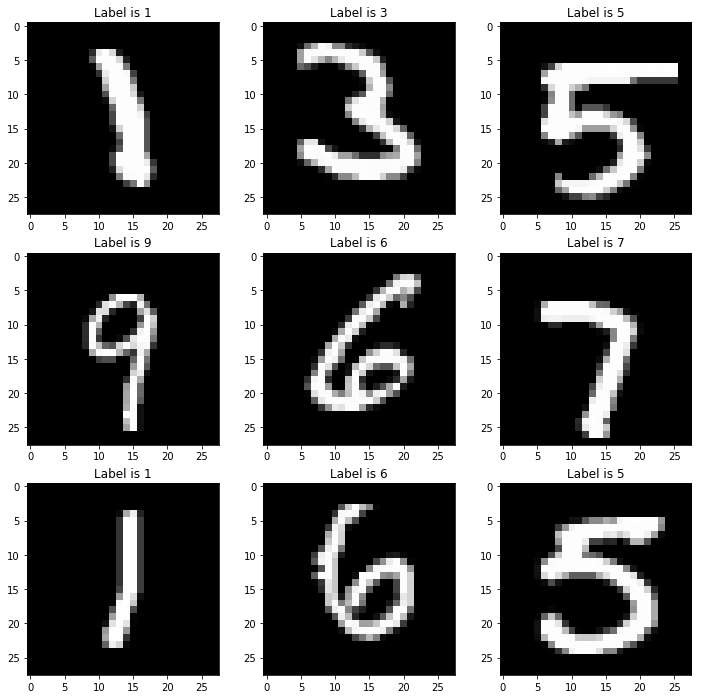

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

random_indices = np.random.randint(0, x_train.shape[0], size=9)

fig = plt.figure(figsize=(12,12))
for i, ridx in enumerate(random_indices):
    fig.add_subplot(3,3,i+1)
    plt.title('Label is {label}'.format(label=y_train[ridx]))
    plt.imshow(x_train[ridx], cmap='gray')
plt.show()

In [4]:
num_classes = 10

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
epochs = 20
batch_size = 128

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))

model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.6f}'.format(score[0]))
print('Test accuracy: {:.2f} %'.format(score[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.2238 - acc: 0.9317 - val_loss: 0.0920 - val_acc: 0.9714
Epoch 2/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.0824 - acc: 0.9746 - val_loss: 0.0785 - val_acc: 0.9758
Epoch 3/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.0771 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 16s 270us/step - loss: 0.0405 - acc: 0.9870 - val_loss: 0.0818 - val_acc: 0.9789
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0853 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0790 - val_acc: 0.9818
Epoch 7/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.

In [7]:
model_do = Sequential()
model_do.add(Dropout(0.2, input_shape=(784,)))
model_do.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model_do.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model_do.add(Dense(num_classes, activation='softmax'))


model_do.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [8]:
model_do.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score_do = model_do.evaluate(x_test, y_test, verbose=0)
improve = (score_do[1] - score[1])/(1.0-score[1])
print('Test loss: {:.6f}'.format(score_do[0]))
print('Test accuracy: {:.2f} %'.format(score_do[1]*100))
print('Accuracy improvement: {:.2f} %'.format(improve*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.2608 - acc: 0.9199 - val_loss: 0.1140 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 24s 406us/step - loss: 0.1090 - acc: 0.9661 - val_loss: 0.0888 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 13s 208us/step - loss: 0.0811 - acc: 0.9743 - val_loss: 0.0756 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0667 - val_acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0557 - acc: 0.9828 - val_loss: 0.0629 - val_acc: 0.9829
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0493 - acc: 0.9851 - val_loss: 0.0684 - val_acc: 0.9805
Epoch 7/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0430 - acc: 0.9867 - val_loss: 0.

# Language Modeling

In [9]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import TimeDistributed, Dropout, Embedding, BatchNormalization
from tensorflow.python.keras.optimizers import RMSprop, Adagrad, Adam, SGD
from tensorflow.python.keras.utils import get_file
import numpy as np
import random
import sys

## TASK 1: Preprocessing

In [14]:
path = '../rsc/potop-poczatek.txt'
text = open(path, encoding="utf-8").read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


corpus length: 482805
total chars: 54


In [15]:
print(indices_char)

{0: '\n', 1: ' ', 2: '!', 3: '(', 4: ')', 5: '*', 6: ',', 7: '-', 8: '.', 9: '1', 10: '8', 11: ':', 12: ';', 13: '?', 14: 'a', 15: 'b', 16: 'c', 17: 'd', 18: 'e', 19: 'f', 20: 'g', 21: 'h', 22: 'i', 23: 'j', 24: 'k', 25: 'l', 26: 'm', 27: 'n', 28: 'o', 29: 'p', 30: 'q', 31: 'r', 32: 's', 33: 't', 34: 'u', 35: 'v', 36: 'w', 37: 'x', 38: 'y', 39: 'z', 40: 'ó', 41: 'ą', 42: 'ć', 43: 'ę', 44: 'ł', 45: 'ń', 46: 'ś', 47: 'ź', 48: 'ż', 49: '–', 50: '—', 51: '”', 52: '„', 53: '…'}


In [16]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

nb sequences: 160922


In [17]:
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

## TASK 2: Build the model 

In [18]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

# Right, LSTM and softmax 

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [19]:
def run(model, iterations):
    for iteration in range(1, iterations):
        print('-' * 50)
        print('Iteration', iteration)
        model.fit(X, y, batch_size=128, epochs=1)

        start_index = random.randint(0, len(text) - maxlen - 1)

        print()

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.

            preds = model.predict(x, verbose=0)[0]
            preds = np.asarray(preds).astype('float64')
            
            # Use argmax
            next_index = np.argmax(preds)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
    
    

In [20]:
run(model,20)

--------------------------------------------------
Iteration 1
Epoch 1/1
160922/160922 [==============================] - 287s 2ms/step - loss: 2.2214

----- Generating with seed: "czne. oprócz ludzi zabitych, spostrzeżon"
czne. oprócz ludzi zabitych, spostrzeżony się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przystał się na przysta
--------------------------------------------------
Iteration 2
Epoch 1/1
160922/160922 [==============================] - 232s 1ms/step - loss: 1.8635

----- Generating with seed: "stary kiemlicz wraz z synami, z prośbą, "
stary kiemlicz wraz z synami, z prośbą, aby nie miesz przechodzie z podzierał się na powiedzie, aby nie moje za p

KeyboardInterrupt: 

## TASK 3: Improve predictions

In [ ]:
def sample_letter(preds, temperature=1.0):

    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    

    preds = np.random.multinomial(1, preds, 1)
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]
    return next_char

def run_improved(model, iterations):
    for iteration in range(1, iterations):
        print()
        print('-' * 50)
        print('Iteration', iteration)
        model.fit(X, y, batch_size=128, epochs=1, validation_split=0.2)

        start_index = random.randint(0, len(text) - maxlen - 1)

        for diversity in [0.2, 0.5, 1.0, 1.2]:
            print()
            print('----- diversity:', diversity)

            generated = ''
            sentence = text[start_index: start_index + maxlen]
            generated += sentence
            print('----- Generating with seed: "' + sentence + '"')
            sys.stdout.write(generated)

            for i in range(400):
                x = np.zeros((1, maxlen, len(chars)))
                for t, char in enumerate(sentence):
                    x[0, t, char_indices[char]] = 1.

                preds = model.predict(x, verbose=0)[0]
                preds = np.asarray(preds).astype('float64')
                next_char = sample_letter(preds, diversity)

                generated += next_char
                sentence = sentence[1:] + next_char

                sys.stdout.write(next_char)
                sys.stdout.flush()
            print()

In [ ]:
run_improved(model,20)

## TASK 4: Improve the model

In [ ]:
model_improved = Sequential()
model_improved.add(TimeDistributed(Dense(16), input_shape=(maxlen, len(chars) )))
model_improved.add(BatchNormalization())
model_improved.add(LSTM(64, return_sequences=True))
model_improved.add(BatchNormalization())

model_improved.add(LSTM(128))

model_improved.add(BatchNormalization())
model_improved.add(Dense(len(chars)))
model_improved.add(Activation('softmax'))

optimizer = Adagrad(lr=0.05, decay=10e-5)
model_improved.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["acc"])

In [ ]:
run_improved(model_improved,40)

In [ ]:
model_improved.save('my_LM.h5')
del model_improved, model

In [ ]:
model = load_model('../models/pretrained_LM.h5')
model_improved =  load_model('../models/pretrained_LM.h5')